**Importing Libraries**

In [ ]:
import pandas_datareader.data as web
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')



In [ ]:
import datetime as dt
import yfinance as yf

start = dt.datetime(2013, 1, 1)
end = dt.datetime(2022, 10, 1)

tickers = ['AAPL', 'AMZN', 'MSFT', 'GOOGL', 'NVDA']

# Download data from Yahoo Finance
stocks = yf.download(tickers, start=start, end=end)['Adj Close']

# Display the first few rows of the DataFrame
print(stocks.head())

[*********************100%***********************]  5 of 5 completed
                 AAPL     AMZN      GOOGL       MSFT      NVDA
Date                                                          
2013-01-02  16.813856  12.8655  18.099348  22.668222  2.936478
2013-01-03  16.601625  12.9240  18.109859  22.364567  2.938786
2013-01-04  16.139202  12.9575  18.467718  21.945997  3.035745
2013-01-07  16.044262  13.4230  18.387136  21.904961  2.948021
2013-01-08  16.087439  13.3190  18.350851  21.790060  2.883382


,AAPL,AMZN,GOOGL,MSFT,NVDA,Port
Date,,,,,,
2022-09-30,8.181971,8.78318,5.284721,10.197531,41.31677,13.225672


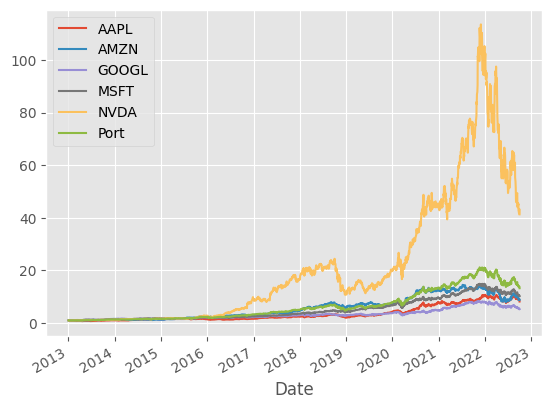

In [ ]:
df = stocks.pct_change().dropna()
df['Port'] = df.mean(axis=1) # 20% apple, ... , 20% facebook
(df+1).cumprod().plot()

(df+1).cumprod()[-1:]


The plot shows the growth of \$1 invested on 1st Jan 2013 until 10th Oct 2022. For every \$1 you invested in Apple in 2013 you would now have approximately \$8 and so-forth.


**SHARPE RATIO**

The Sharpe ratio is the most common ratio for comparing reward (return on investment) to risk (standard deviation). This allows us to adjust the returns on an investment by the amount of risk that was taken in order to achieve it. The Sharpe ratio also provides a useful metric to compare investments. The calculations are as follows:

Sharpe ratio
=
(R
−
Rf)/
σ

R
:  annual expected return of the asset.

Rf
 : annual risk-free rate. Think of this like a deposit in the bank earning x% per annum.  
σ
  :  annualized standard deviation of returns.


<Axes: >

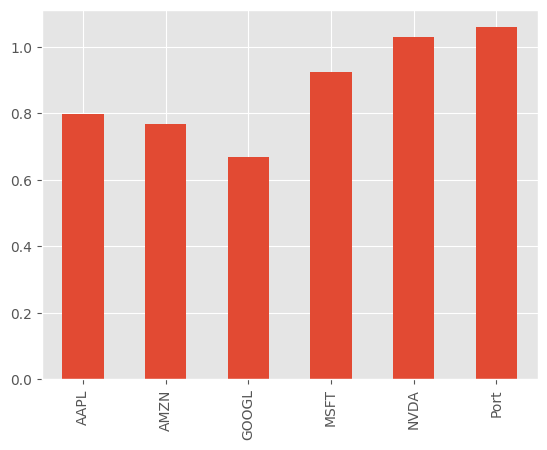

In [ ]:
def sharpe_ratio(return_series, N, rf):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

N = 255 #255 trading days in a year
rf =0.03 #3% risk free rate
sharpes = df.apply(sharpe_ratio, args=(N,rf,),axis=0)

sharpes.plot.bar()

**SORTINO RATIO**

Sortino ratio
=(
R
−
R
f)/
σ
−

Everything in the ratio above is the same as the Sharpe ratio except
σ
−
 represents the annualized down-side standard deviation.

Text(0, 0.5, 'Sortino Ratio')

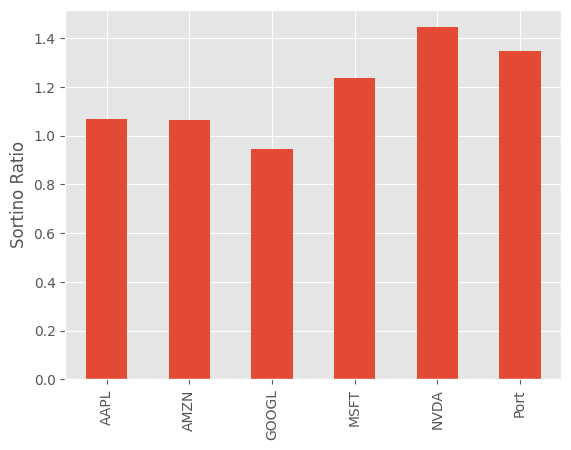

In [ ]:
def sortino_ratio(series, N,rf):
    mean = series.mean() * N -rf
    std_neg = series[series<0].std()*np.sqrt(N)
    return mean/std_neg


sortinos = df.apply(sortino_ratio, args=(N,rf,), axis=0 )
sortinos.plot.bar()
plt.ylabel('Sortino Ratio')

**Max Drawdown**

To calculate max drawdown first we need to calculate a series of drawdowns as follows:

drawdowns
=
peak-trough/
peak


Text(0, 0.5, 'Max Drawdown')

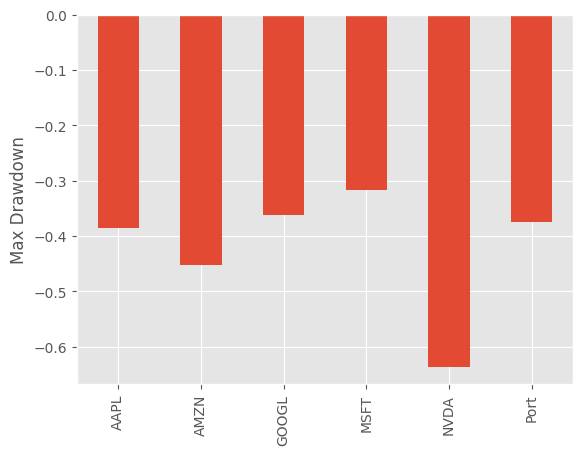

In [ ]:
def max_drawdown(return_series):
    comp_ret = (return_series+1).cumprod()
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret/peak)-1
    return dd.min()


max_drawdowns = df.apply(max_drawdown,axis=0)
max_drawdowns.plot.bar()
plt.ylabel('Max Drawdown')

**Calmer Ratio**

The final risk/reward ratio we will consider is the Calmar ratio. This is similar to the other ratios, with the key difference being that the Calmar ratio uses max drawdown in the denominator as opposed to standard deviation.

Calmar ratio
=
R/
max drawdown



Text(0, 0.5, 'Calmar ratio')

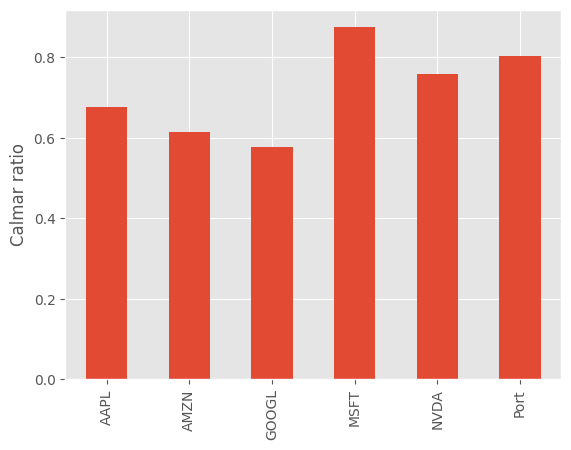

In [ ]:
calmars = df.mean()*255/abs(max_drawdowns)

calmars.plot.bar()
plt.ylabel('Calmar ratio')

**Combining All Ratio's**



In [ ]:
btstats = pd.DataFrame()
btstats['sortino'] = sortinos
btstats['sharpe'] = sharpes
btstats['maxdd'] = max_drawdowns
btstats['calmar'] = calmars

btstats

,sortino,sharpe,maxdd,calmar
AAPL,1.068419,0.797304,-0.385159,0.675952
AMZN,1.061729,0.768339,-0.451628,0.614954
GOOGL,0.943511,0.667806,-0.361646,0.576838
MSFT,1.236827,0.924025,-0.316774,0.875126
NVDA,1.444132,1.029911,-0.636004,0.759611
Port,1.347444,1.058855,-0.374970,0.803810


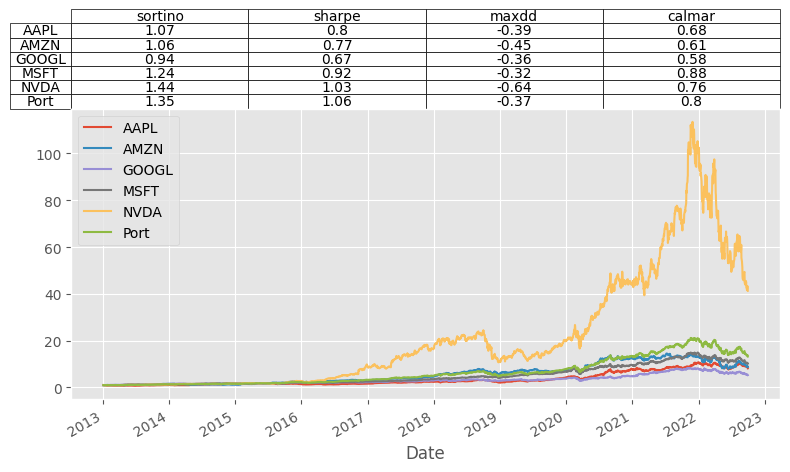

In [ ]:
(df+1).cumprod().plot(figsize=(8,5))
plt.table(cellText=np.round(btstats.values,2), colLabels=btstats.columns,
          rowLabels=btstats.index,rowLoc='center',cellLoc='center',loc='top',
          colWidths=[0.25]*len(btstats.columns))
plt.tight_layout()